<a href="https://colab.research.google.com/github/Somcodo4/rul-prediction-of-lithium-ion-batteries/blob/main/IK_ANN_without_cycle_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ANN
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
data = pd.read_csv('Battery_RUL_II cleaned 2.csv')

In [5]:
data.head()

,Cycle Count,Discharge Time,Decrement time 3.6 V to 3.4 V,Max Voltage Discharge,Min Voltage Charge,Time at 4.15 V,Time constant current,Charging time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,7,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106


In [6]:
data.head()

,Cycle Count,Discharge Time,Decrement time 3.6 V to 3.4 V,Max Voltage Discharge,Min Voltage Charge,Time at 4.15 V,Time constant current,Charging time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,7,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106


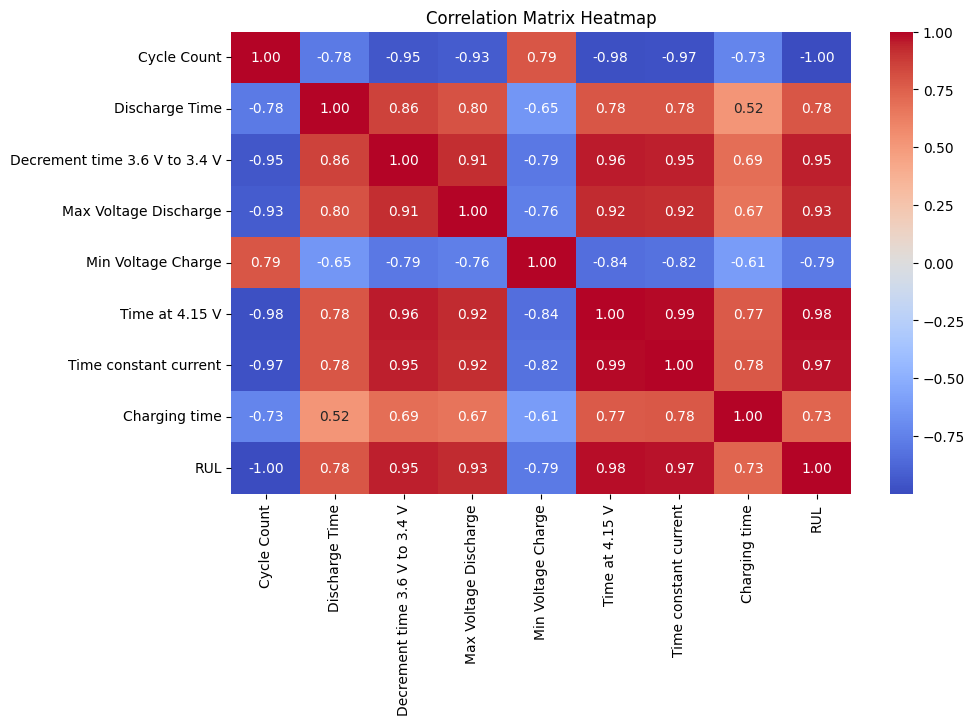

In [7]:
# Calculate Correlation Matrix
correlation_matrix = data.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Select the features and target variable
features = ['Cycle Count', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
            'Max Voltage Dischar. (V)', 'Min Voltage Charg. (V)',
            'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']
target = 'RUL'

In [9]:
# Split features (X) and target variable (y)
# Change 'df' to 'data'
X = data.drop(columns=['Cycle Count', 'RUL'])  # Change 'df' to 'data'
y = data['RUL']  # Change 'df' to 'data'

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers to the training data
X_train_scaled = scaler_X.fit_transform(X_train)
# Access the underlying NumPy array of the Series using 'values' before reshaping
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Scale the test data using the same scalers
X_test_scaled = scaler_X.transform(X_test)
# Access the underlying NumPy array of the Series using 'values' before reshaping
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Build the improved ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))  # Add L2 regularization
model.add(Dropout(0.3))  # Regularization to prevent overfitting
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(units=1))  # Output layer

# Compile the model with a reduced learning rate
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks for smoother training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=150, batch_size=64, validation_split=0.15, verbose=1)


Epoch 1/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3969 - mae: 0.3599 - val_loss: 0.5336 - val_mae: 0.1604
Epoch 2/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4642 - mae: 0.1968 - val_loss: 0.2420 - val_mae: 0.1388
Epoch 3/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2326 - mae: 0.1821 - val_loss: 0.1387 - val_mae: 0.1374
Epoch 4/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1438 - mae: 0.1728 - val_loss: 0.0956 - val_mae: 0.1364
Epoch 5/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1047 - mae: 0.1670 - val_loss: 0.0740 - val_mae: 0.1307
Epoch 6/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0878 - mae: 0.1677 - val_loss: 0.0660 - val_mae: 0.1338
Epoch 7/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0780 - mae: 0.1640 - val_loss: 0.0626 - val_mae: 0.1352
Epoch 8/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0727 - mae: 0.1624 - val_loss: 0.0599 - val_mae: 0.1377
Epoch 9/150
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [14]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled).ravel()
y_test_inv = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f"ANN Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Model Evaluation Metrics:
Mean Squared Error (MSE): 2216.99
Root Mean Squared Error (RMSE): 47.08
Mean Absolute Error (MAE): 36.32
R-squared (R²): 0.98


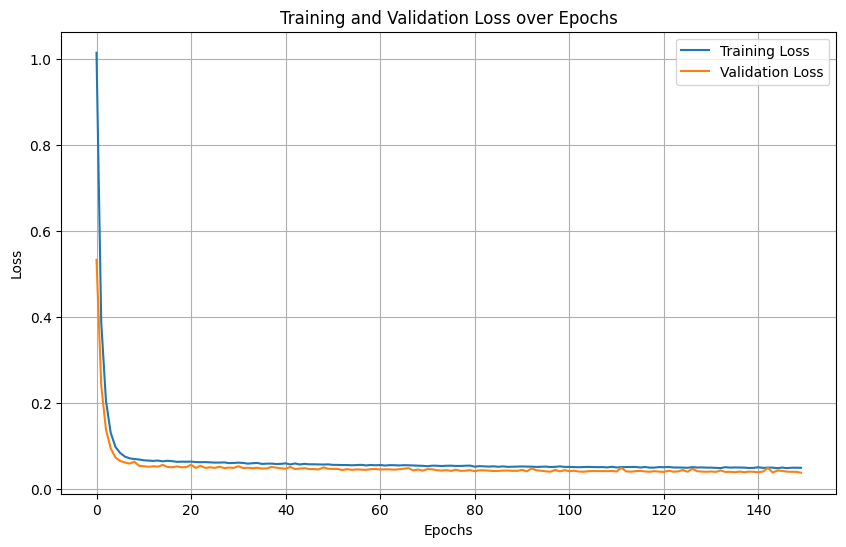

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


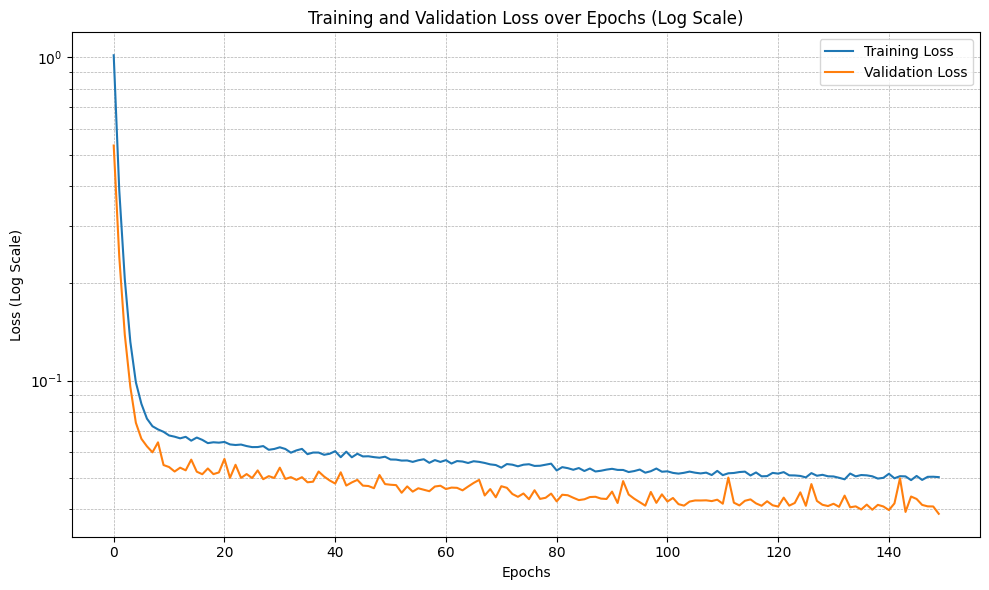

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation loss with log y-axis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.yscale('log')  # ← Log scale applied here

plt.title('Training and Validation Loss over Epochs (Log Scale)')
plt.xlabel('Epochs')
plt.ylabel('Loss (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


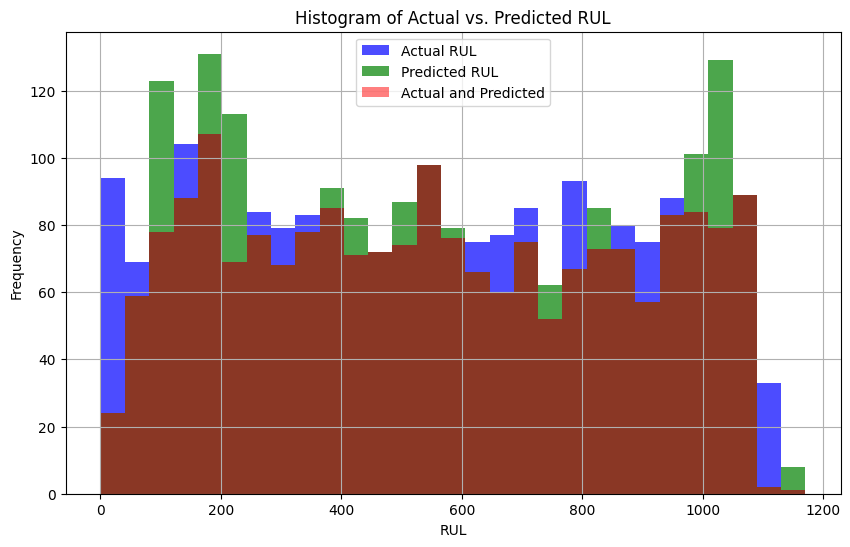

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bins for the histogram
bins = np.linspace(min(min(y_test_inv), min(y_pred)), max(max(y_test_inv), max(y_pred)), 30)

# Compute the histograms
actual_hist, _ = np.histogram(y_test_inv, bins=bins)
predicted_hist, _ = np.histogram(y_pred, bins=bins)

# Find the overlapping region
overlap = np.minimum(actual_hist, predicted_hist)

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(y_test_inv, bins=bins, alpha=0.7, label='Actual RUL', color='blue')
plt.hist(y_pred, bins=bins, alpha=0.7, label='Predicted RUL', color='green')

# Add the overlap region
plt.bar(bins[:-1], overlap, width=np.diff(bins), align='edge', color='red', alpha=0.5, label='Actual and Predicted')

# Add labels and title
plt.title('Histogram of Actual vs. Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


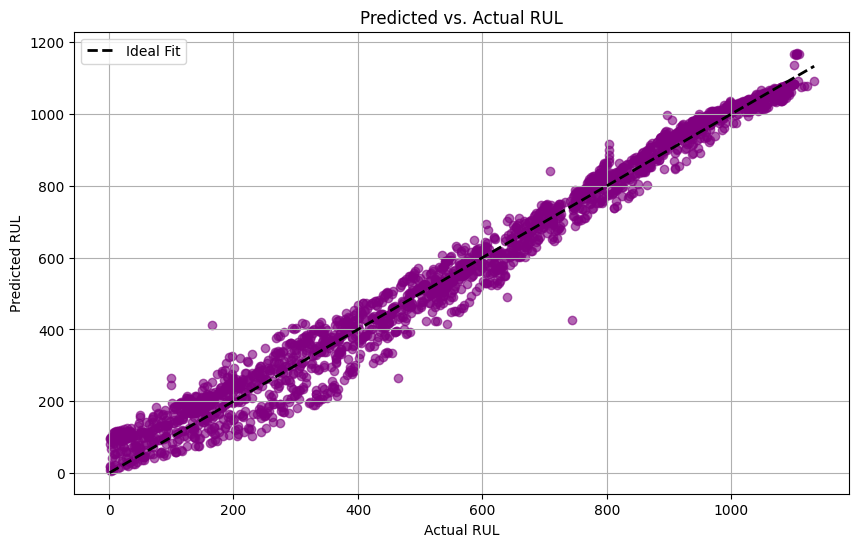

In [18]:
# Scatter plot of predicted vs actual RUL values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inv, y_pred, alpha=0.6, color='purple')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--', lw=2, label='Ideal Fit')
plt.title('Predicted vs. Actual RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assume ann_model, scaler_X, and scaler_y are already trained and loaded

# Function to get user input
def get_user_input():
    #Cycle_Count = float(input("Enter Cycle Count: "))
    Discharge_Time = float(input("Enter Discharge Time (s): "))
    Decrement = float(input("Enter Decrement 3.6-3.4V (s): "))
    Max_Voltage_Discharge = float(input("Enter Max Voltage Discharge (V): "))
    Min_Voltage_Charge = float(input("Enter Min Voltage Charge (V): "))
    Time_at_415V = float(input("Enter Time at 4.15V (s): "))
    Time_constant_current = float(input("Enter Time constant current (s): "))
    Charging_time = float(input("Enter Charging time (s): "))
    return [Discharge_Time, Decrement, Max_Voltage_Discharge, Min_Voltage_Charge, Time_at_415V, Time_constant_current, Charging_time]

# Function to preprocess user input for the ANN model
def preprocess_input_for_ann(user_features, scaler_X):
    # Convert user input to a NumPy array and scale it
    user_features_scaled = scaler_X.transform(np.array(user_features).reshape(1, -1))
    return user_features_scaled

# Function to predict RUL using the trained ANN model
def predict_rul_ann(user_features, ann_model, scaler_X, scaler_y):
    # Preprocess user input for the ANN model
    user_features_scaled = preprocess_input_for_ann(user_features, scaler_X)

    # Predict the scaled RUL using the ANN model
    predicted_rul_scaled = ann_model.predict(user_features_scaled)

    # Inverse transform the predicted RUL to get the original scale
    predicted_rul = scaler_y.inverse_transform(predicted_rul_scaled).ravel()[0]

    return predicted_rul

# Function to map RUL to battery health categories
def map_to_battery_health(rul):
    if rul >= 741:
        return 'Excellent Battery Health'
    elif rul >= 371:
        return 'Average Battery Health'
    else:
        return 'Low or Poor Battery Health'

# Function to suggest optimization strategies based on battery health category
def suggest_optimization(category):
    if category == 'Excellent Battery Health':
        suggestions = [
            "Regular Monitoring: Continuously monitor the battery’s performance parameters.",
            "Optimal Charging Practices: Avoid overcharging and deep discharging. Use smart chargers.",
            "Temperature Management: Ensure the battery operates within the optimal temperature range.",
            "Balanced Usage: Ensure cells are balanced if the battery is part of a pack.",
            "Software Updates: Keep battery management software updated."
        ]
    elif category == 'Average Battery Health':
        suggestions = [
            "Conditioning Cycles: Perform controlled charging and discharging cycles.",
            "Reduced Load: Lower the load on the battery whenever possible.",
            "Partial Charging: Maintain the battery’s state of charge between 20% and 80%.",
            "Routine Maintenance: Regularly clean and check connections and terminals.",
            "Usage Adjustments: Adjust usage patterns to avoid high-drain scenarios."
        ]
    else:  # Low or Poor Battery Health
        suggestions = [
            "Capacity Testing: Regularly test the battery’s capacity.",
            "Load Reduction: Significantly reduce the load to prevent sudden failures.",
            "Refurbishment: Consider battery refurbishment options.",
            "Preemptive Replacement: Replace the battery to avoid unexpected failures.",
            "Recycling: Ensure proper recycling procedures for disposed batteries."
        ]
    return suggestions

# Example usage:
# Assuming 'ann_model' is your trained ANN model, and 'scaler_X' and 'scaler_y' are your fitted scalers

# Get user input for features
user_features = get_user_input()

# Predict RUL based on user input using the ANN model
predicted_rul = predict_rul_ann(user_features, model, scaler_X, scaler_y)

# Map the predicted RUL to a battery health category
predicted_health_category = map_to_battery_health(predicted_rul)

# Suggest optimization strategies based on the battery health category
optimization_suggestions = suggest_optimization(predicted_health_category)

# Display the results
print("\nThe Predicted Remaining Useful Life (RUL) of your battery in Charge/Discharge Circle is {:.2f}".format(predicted_rul))
print("This estimate is a rough approximation and actual RUL can vary based on factors such as  usage patterns, temperature, and charging habits.")
print("The battery health category is:", predicted_health_category)
print("Optimization Strategies:")
for suggestion in optimization_suggestions:
    print(f"- {suggestion}")


Enter Discharge Time (s): 900
Enter Decrement 3.6-3.4V (s): 2400
Enter Max Voltage Discharge (V): 3.9
Enter Min Voltage Charge (V): 3.1
Enter Time at 4.15V (s): 3400
Enter Time constant current (s): 3210
Enter Charging time (s): 3290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

The Predicted Remaining Useful Life (RUL) of your battery in Charge/Discharge Circle is 827.94
This estimate is a rough approximation and actual RUL can vary based on factors such as  usage patterns, temperature, and charging habits.
The battery health category is: Excellent Battery Health
Optimization Strategies:
- Regular Monitoring: Continuously monitor the battery’s performance parameters.
- Optimal Charging Practices: Avoid overcharging and deep discharging. Use smart chargers.
- Temperature Management: Ensure the battery operates within the optimal temperature range.
- Balanced Usage: Ensure cells are balanced if the battery is part of a pack.
- Software Updates: Keep battery management software updated.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Feature Importance for ANN Model (Permutation Feature Importance):
Discharge Time: 92.2110
Time at 4.15V: 83.6729
Max Voltage Discharge: 80.6225
Decrement: 41.4368
Time constant current: 29.1513
Min Voltage Charge: 10.6702
Charging time: 9.8134


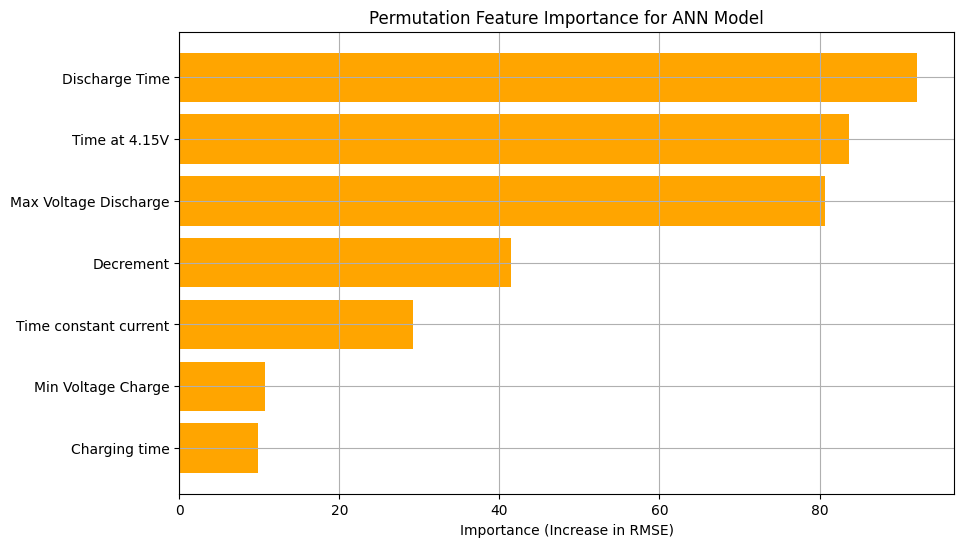

In [20]:
# Permutation feature importance function for ANN
def permutation_feature_importance_ann(model, X_test, y_test, baseline_rmse):
    feature_importance = {}

    # Iterate over each feature
    for i in range(X_test.shape[1]):
        # Make a copy of the test set
        X_test_permuted = X_test.copy()

        # Shuffle the values of the current feature
        np.random.shuffle(X_test_permuted[:, i])

        # Predict on the permuted data
        y_pred_permuted_scaled = model.predict(X_test_permuted)
        y_pred_permuted = scaler_y.inverse_transform(y_pred_permuted_scaled).ravel()

        # Calculate RMSE with the permuted feature
        permuted_rmse = np.sqrt(mean_squared_error(y_test, y_pred_permuted))

        # Compute the importance as the increase in RMSE
        feature_importance[i] = permuted_rmse - baseline_rmse

    return feature_importance

# Calculate baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))

# Get permutation feature importance
feature_importance = permutation_feature_importance_ann(model, X_test_scaled, y_test_inv, baseline_rmse)

# Map feature indices to feature names
feature_names = ['Discharge Time',  'Decrement', 'Max Voltage Discharge', 'Min Voltage Charge', 'Time at 4.15V', 'Time constant current', 'Charging time']
feature_importance_named = {feature_names[i]: importance for i, importance in feature_importance.items()}

# Sort feature importance
feature_importance_sorted = dict(sorted(feature_importance_named.items(), key=lambda item: item[1], reverse=True))

# Display the feature importance
print("Feature Importance for ANN Model (Permutation Feature Importance):")
for feature, importance in feature_importance_sorted.items():
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(list(feature_importance_sorted.keys()), list(feature_importance_sorted.values()), color='orange')
plt.xlabel('Importance (Increase in RMSE)')
plt.title('Permutation Feature Importance for ANN Model')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
